<a href="https://colab.research.google.com/github/ValentinaEmili/Sign_language/blob/main/Hands_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive on colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import cv2
import requests
import os
from google.colab.patches import cv2_imshow

In [ ]:
# load the JSON data
js_file = pd.read_json("/content/drive/MyDrive/NLP/WLASL_v0.3.json")
folder = "/content/drive/MyDrive/NLP/dataset/"

training_folder = folder + "train/"
test_folder = folder + "test/"
training_video = training_folder + "video/"
test_video = test_folder + "video/"
training_images = training_folder + "images/"
test_images = test_folder + "images/"
os.makedirs(training_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(training_video, exist_ok=True)
os.makedirs(test_video, exist_ok=True)
os.makedirs(training_images, exist_ok=True)
os.makedirs(test_images, exist_ok=True)

# check the length of the directories and that they contain the same things
# all videos with fps=25
# {'asl5200',     youtube.com
# 'aslbrick',     mp4
# 'asldeafined',  mp4
# 'asllex',       youtu.be
# 'aslpro',       swf
# 'aslsearch',    mp4
# 'aslsignbank',  mp4
# 'aslu',         youtube.com
# 'elementalasl', mov (like mp4 maybe?)
# 'handspeak',    mp4
# 'lillybauer',   youtube.com
# 'nabboud',      youtube.com
# 'northtexas',   youtube.com
# 'scott',        youtube.com
# 'signingsavvy', mp4
# 'signschool',   mp4
# 'spreadthesign',mp4
# 'startasl',     mp4
# 'valencia-asl'} youtube.com

In [ ]:
js_file['instances'][0]

In [ ]:
from genericpath import exists
# Load the JSON data
js_file = pd.read_json("/content/drive/MyDrive/NLP/WLASL_v0.3.json")
folder = "/content/drive/MyDrive/NLP/dataset/"
training_folder = folder + "train/"
test_folder = folder + "test/"
training_video = training_folder + "video/"
test_video = test_folder + "video/"
training_images = training_folder + "images/"
test_images = test_folder + "images/"
os.makedirs(training_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(training_video, exist_ok=True)
os.makedirs(test_video, exist_ok=True)
os.makedirs(training_images, exist_ok=True)
os.makedirs(test_images, exist_ok=True)

for i, word in enumerate(list(js_file['gloss'])):
  for j, instance in enumerate(js_file['instances'][i]):

    video_id = js_file['instances'][i][j]['video_id']
    url = js_file['instances'][i][j]['url']
    try:
      resp = requests.get(url, stream=True)

      if js_file['instances'][i][j]['split'] == 'train':
        dest_file = training_video + js_file['gloss'][i] + '.mp4'
        with open(dest_file, mode='wb') as f:
          f.write(resp.content)

      else:
        dest_file = test_video + js_file['gloss'][i] + '.mp4'
        with open(dest_file, mode='wb') as f:
          f.write(resp.content)
    except:
      continue

In [ ]:
js_file['instances'][0]

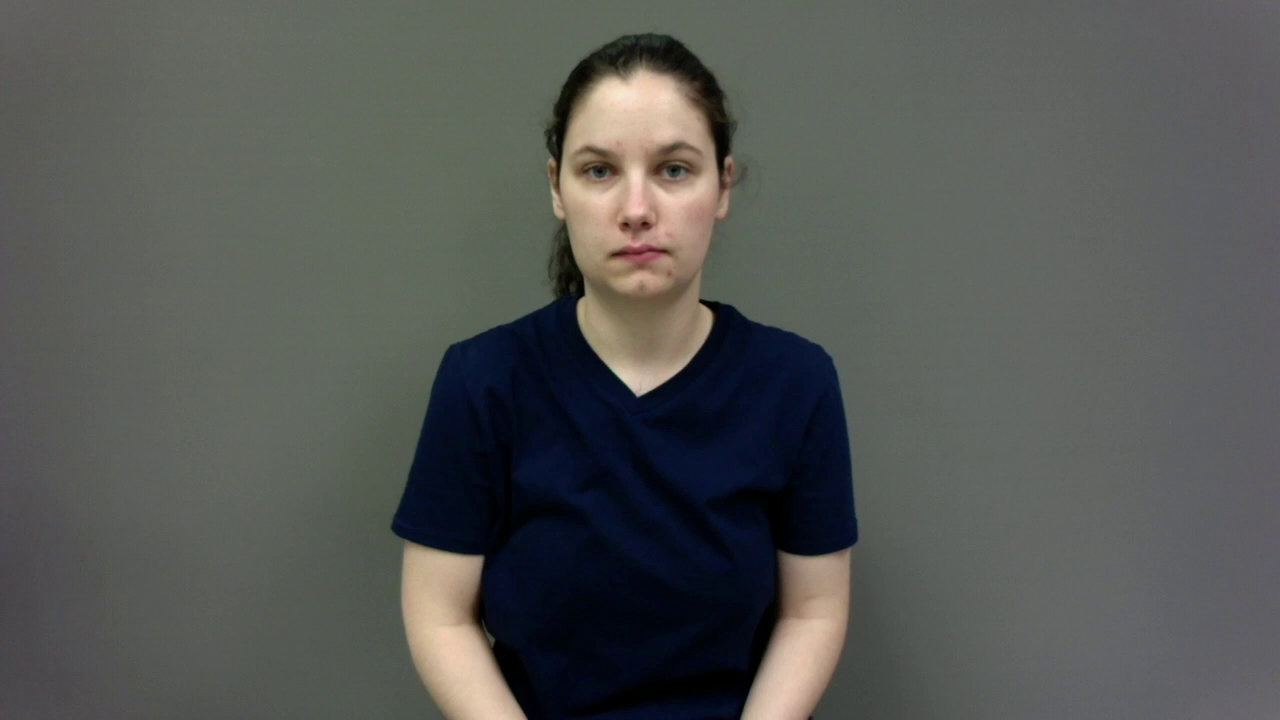

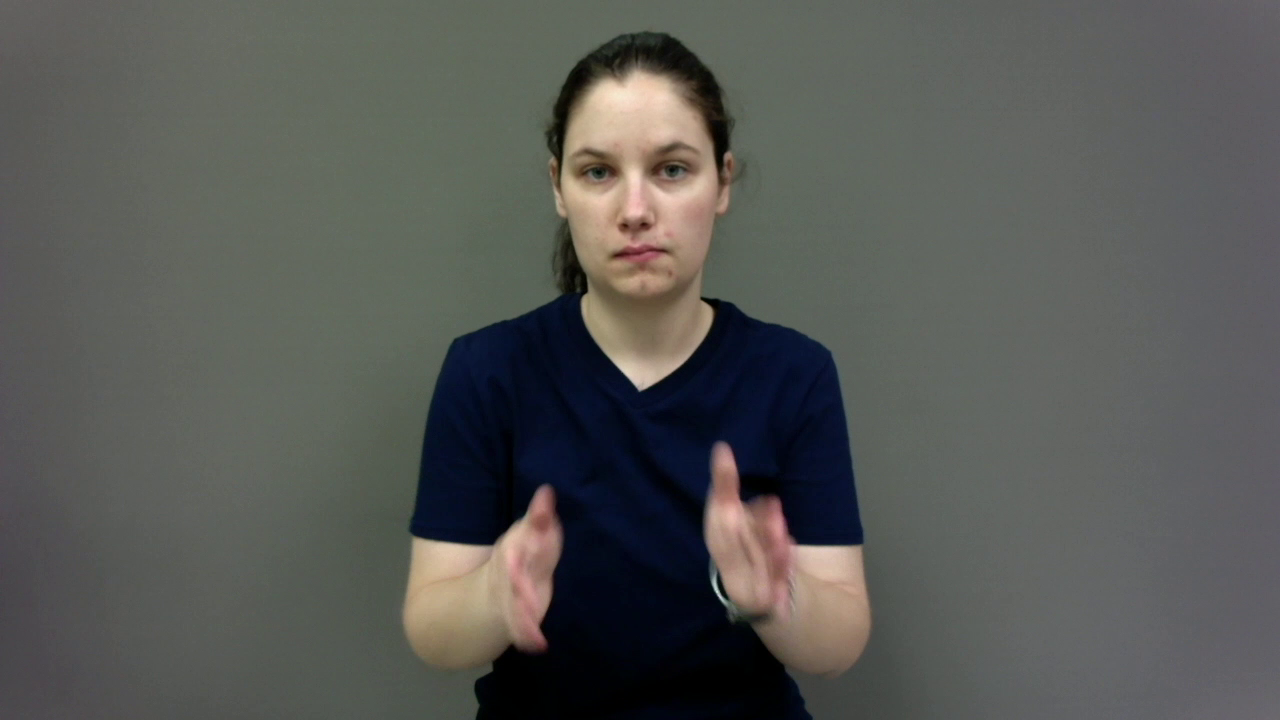

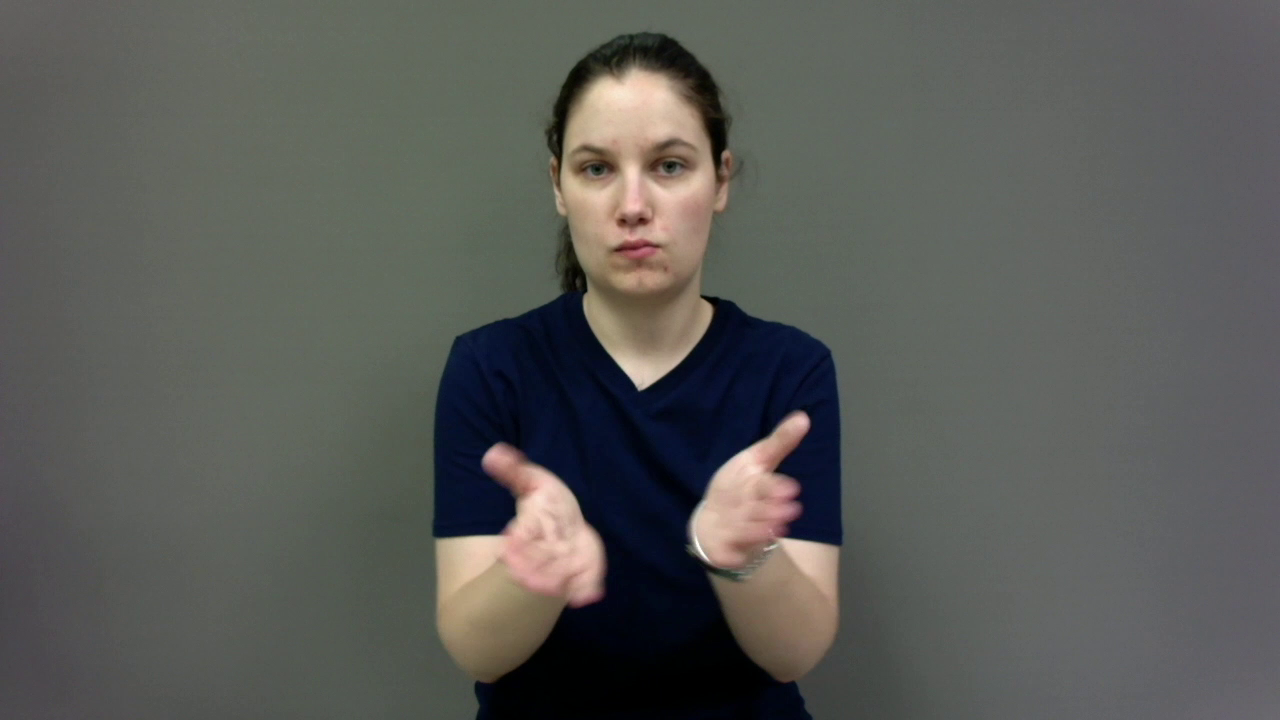

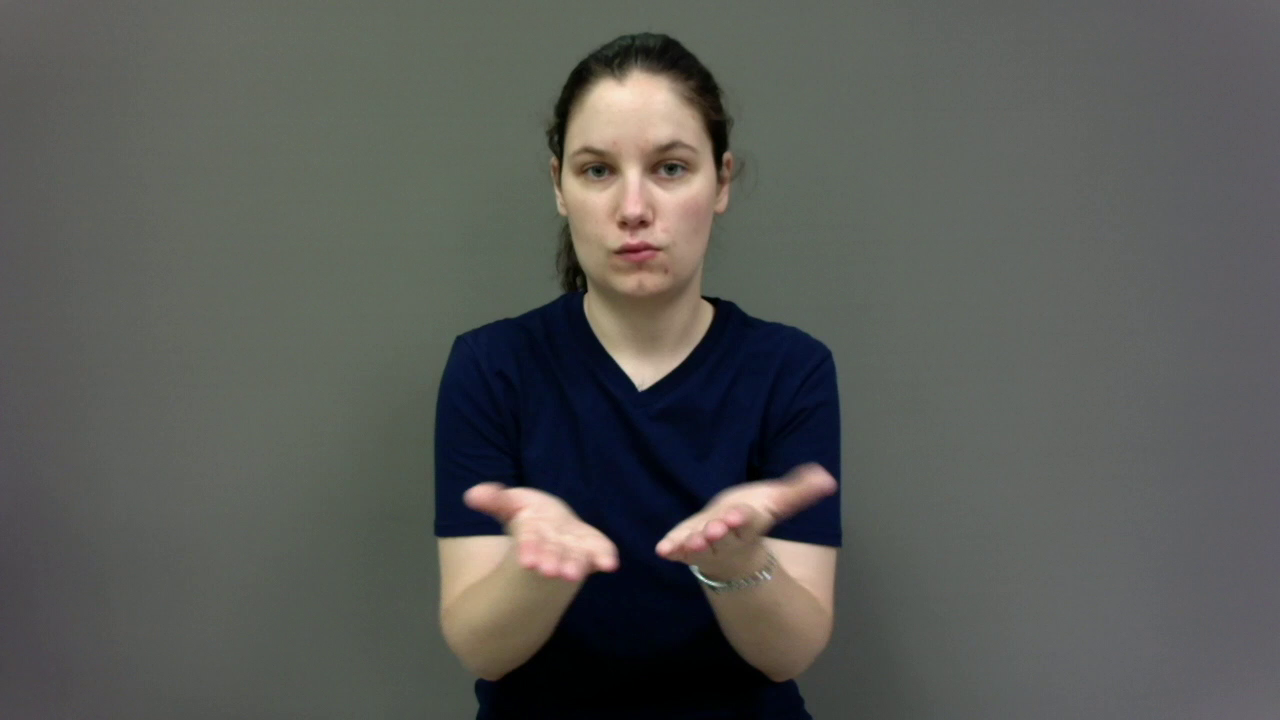

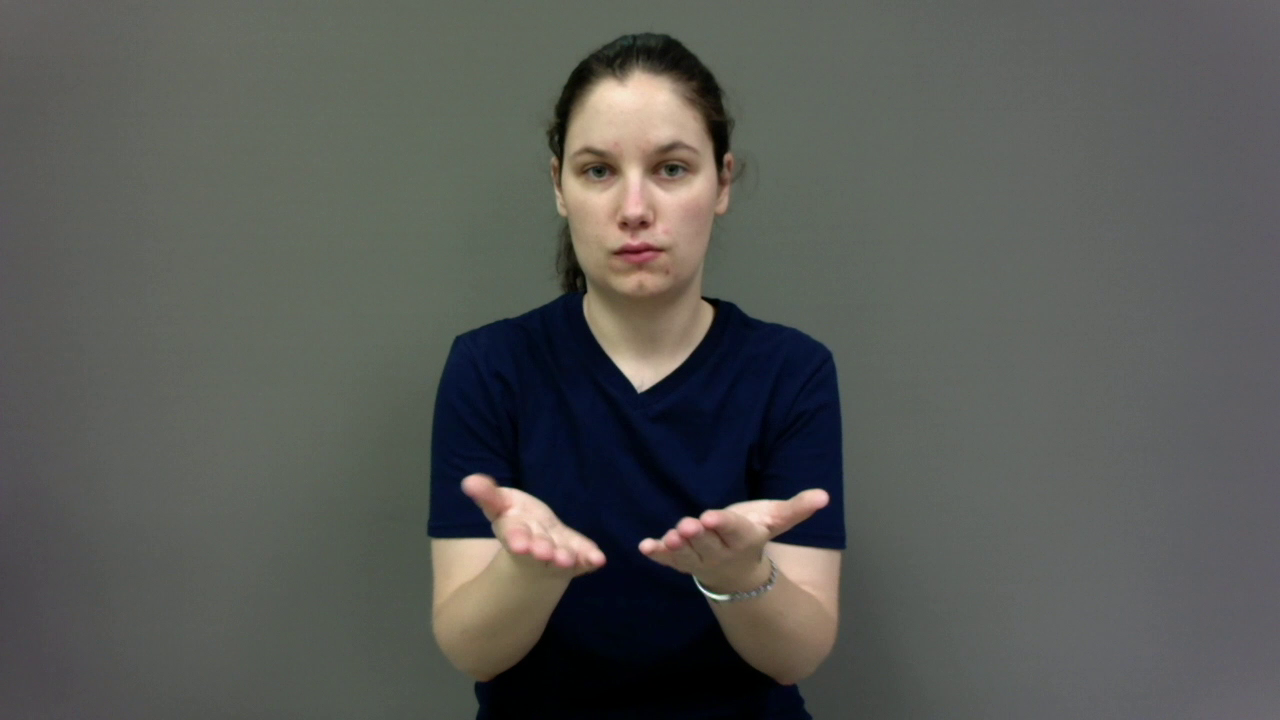

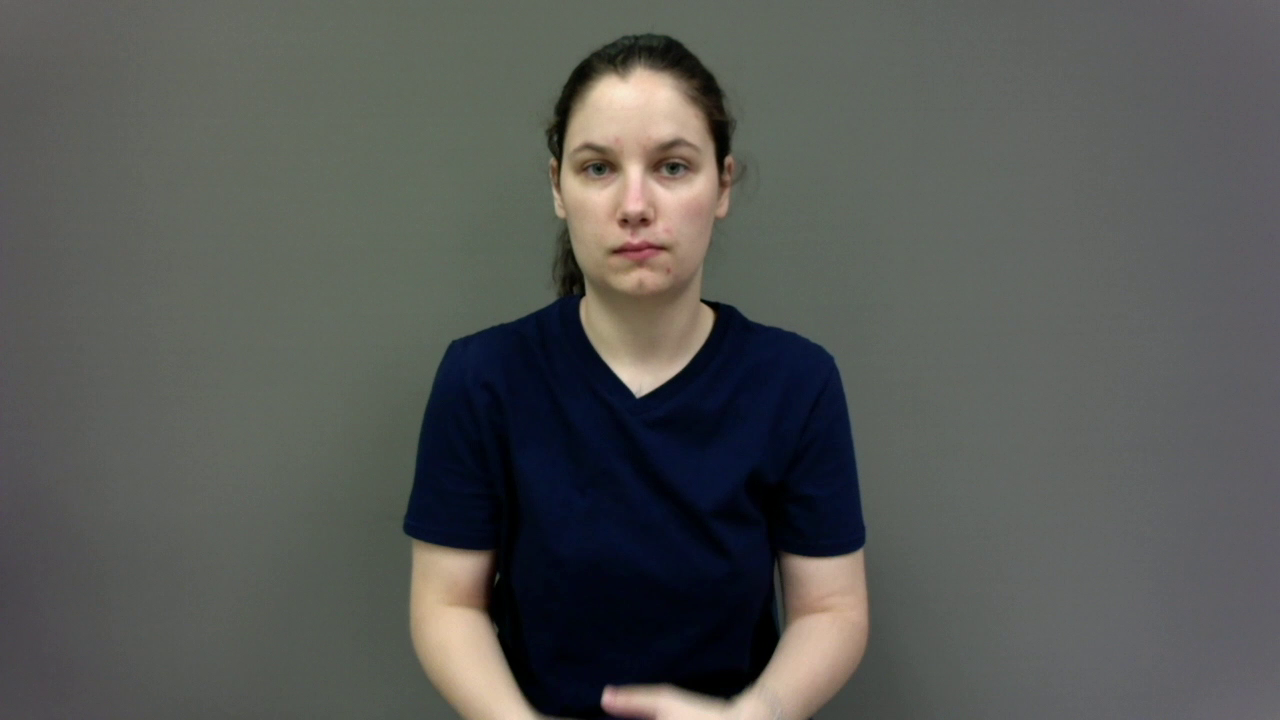

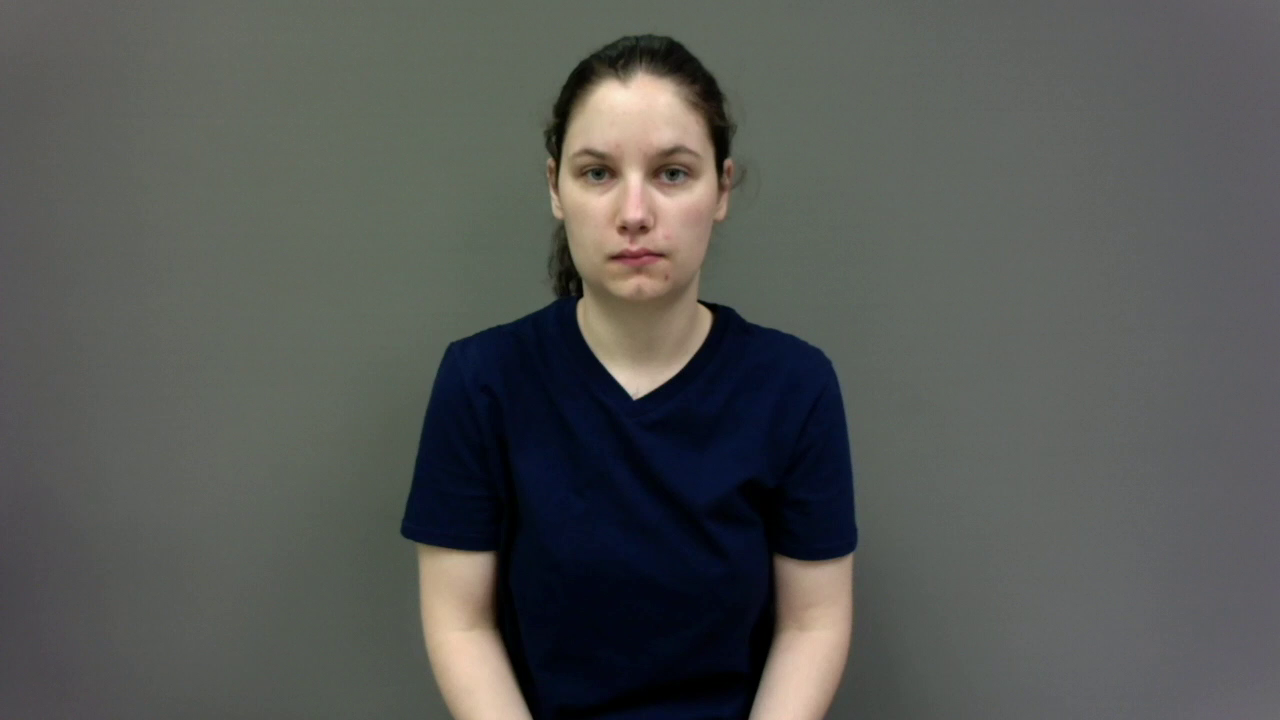

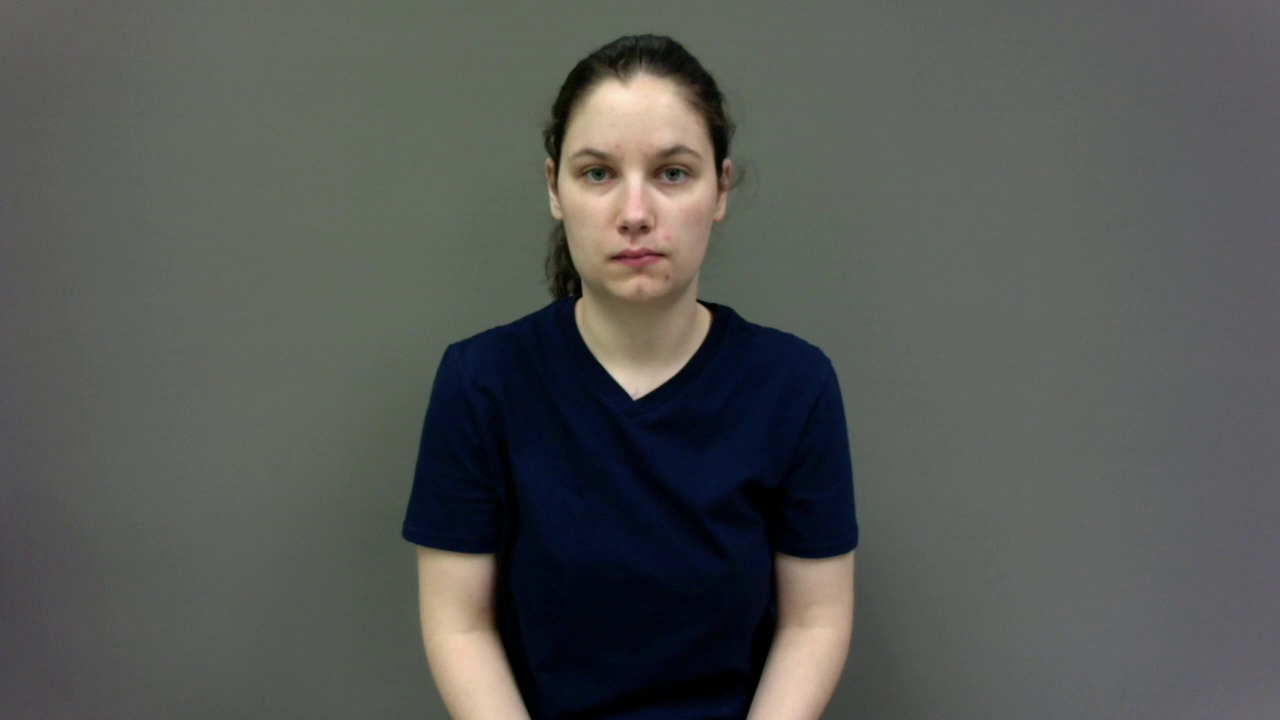

In [ ]:
import pandas as pd
import cv2
import requests
import os
from google.colab.patches import cv2_imshow

# Load the JSON data
js_file = pd.read_json("/content/drive/MyDrive/NLP/WLASL_v0.3.json")
url = js_file['instances'][0][0]['url']
folder = "/content/drive/MyDrive/NLP/dataset/" + js_file['gloss'][0] + "/video/"
instance = js_file['instances'][0][0]['video_id']

# Create the destination folder if it doesn't exist
dest_file = folder + instance + ".mp4"
os.makedirs(os.path.dirname(dest_file), exist_ok=True)

# Download the video
resp = requests.get(url)
with open(dest_file, mode="wb") as f:
  f.write(resp.content)
# _________________________________________________________________________________________________________________________________________________
# Open the video file
cap = cv2.VideoCapture(dest_file)

# Get FPS and total frames from the video
fps = js_file['instances'][0][0]['fps']
cap.set(cv2.CAP_PROP_FPS, fps)

curr_frame = 0
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

while True:
  ret, frame = cap.read()
  if not ret:
    break
  if curr_frame % 10 == 0:
    cv2_imshow(frame)
    curr_folder = "/content/drive/MyDrive/NLP/dataset/" + js_file['gloss'][0] + "/" + instance
    os.makedirs(curr_folder, exist_ok=True)
    frame_name = curr_folder + "/" + str(curr_frame) + ".jpg"
    cv2.imwrite(frame_name, frame)
  curr_frame += 1